In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop('MEDV', axis=1).values
y = boston.MEDV.values

In [4]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [5]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1,1)

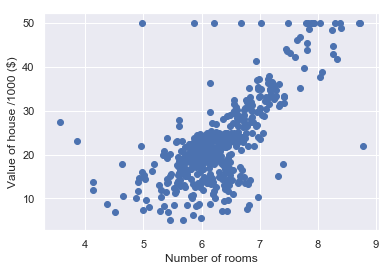

In [6]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Fitting a regression model

In [7]:
from sklearn import linear_model

In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
prediction_space = np.linspace(min(X_rooms),
                              max(X_rooms)).reshape(-1,1)

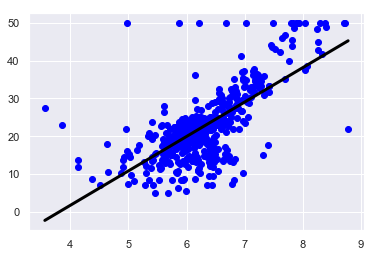

In [11]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),
        color='black', linewidth=3)
plt.show()

In [12]:
df = pd.read_csv('gapminder.csv')
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [13]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')
df = df.fillna(method='ffill')
# Create arrays for features and target variable
y = np.array(df.life).astype(np.float16)
X = np.array(df.fertility).astype(np.float16)

In [14]:
max(y), max(X)

(83.56, 9.23)

In [15]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (10111,)
Dimensions of X before reshaping: (10111,)
Dimensions of y after reshaping: (10111, 1)
Dimensions of X after reshaping: (10111, 1)


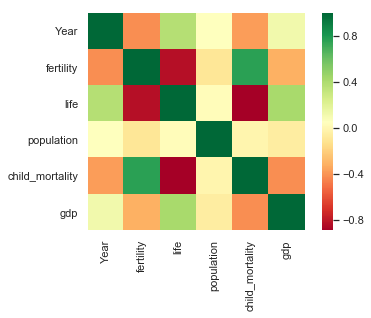

In [16]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10111 entries, 0 to 10110
Data columns (total 8 columns):
Country            10111 non-null object
Year               10111 non-null int64
fertility          10111 non-null float64
life               10111 non-null float64
population         10111 non-null float64
child_mortality    10111 non-null float64
gdp                10111 non-null float64
region             10111 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 632.0+ KB


In [18]:
df.describe()

,Year,fertility,life,population,child_mortality,gdp
count,10111.000000,10111.000000,10111.000000,1.011100e+04,10111.000000,10111.000000
mean,1988.514588,4.028242,64.078600,2.560084e+07,76.181140,14242.931065
std,14.430849,2.012953,11.122779,1.032232e+08,77.507769,20431.346660
min,1964.000000,0.836000,6.000000,1.170000e+03,2.000000,142.000000
25%,1976.000000,2.176991,56.282500,8.875915e+05,17.000000,2282.500000
50%,1989.000000,3.630000,67.157000,4.772216e+06,46.300000,6563.000000
75%,2001.000000,5.903000,72.484000,1.476182e+07,113.500000,17146.000000
max,2013.000000,9.223000,83.580000,1.359368e+09,435.800000,182668.000000


In [19]:
df.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [20]:
def auto(): 
    print('X_train, X_test, y_train, y_test = train_test_split()')
auto()

X_train, X_test, y_train, y_test = train_test_split()


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [23]:
reg_all.score(X_test, y_test)

0.683251429881339

In [24]:
df = pd.read_csv('gapminder.csv')
df = df.fillna(method='ffill')
df = df.groupby(['Country']).mean()

y = np.array(df.life).reshape(-1,1)
X_fertility = np.array(df.fertility).reshape(-1,1)

0.7475561111390951


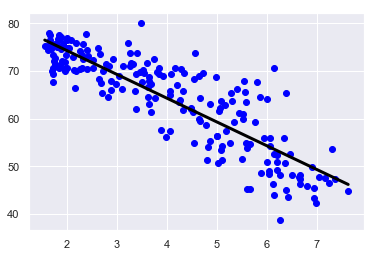

In [25]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [26]:
df = pd.read_csv('gapminder.csv')
df = df.fillna(method='ffill')
df = df.groupby(['Country']).mean()
df.head(3)

,Year,fertility,life,population,child_mortality,gdp
Country,,,,,,
Afghanistan,1988.5,7.35978,47.35280,18272040.82,203.1980,1187.20
Albania,1988.5,3.29010,71.64512,2817009.14,57.4434,5012.52
Algeria,1988.5,5.06534,62.26872,24025124.20,106.0820,9662.18


In [27]:
y = df['life'].values
X = df.drop('life', axis=1).values

In [28]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8474611027951147
Root Mean Squared Error: 3.625262762820296


In [29]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.85478044 0.93229622 0.80190805 0.90611618 0.81569073]
Average 5-Fold CV Score: 0.8621583229958458


In [30]:
%timeit cross_val_score(reg, X, y, cv=3)

2.5 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%timeit cross_val_score(reg, X, y, cv=10)

8.48 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8636895024018059
0.8563161932209779


## Regularized regression

### Why regualrize?
- Recall: Linear Regression minizes a loss function
- It chooses a coefficient for each feature variable
- Large coefficients can lead to overfitting
- Penalizing large coefficients: Regularization

### Ridge regression 
- Loss function = OLS loss function + $\alpha~*\displaystyle\sum_{i=1}^{n}a_i^2$
<br>
- Datasets are penalized for large coefficients
- Alpha: Parameter we need to choose
- Picking alpha her is similar to picking k in k-NN.
- Hyperparameter tuning
- Alpha controls model complexity
 - Alpha = 0: We get back OLS (Can lead to overfitting)
 - Very high alpha: Can lead to overfitting


In [33]:
auto()

X_train, X_test, y_train, y_test = train_test_split()


In [34]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.8519271481820994

### Lasso regression 
- Loss function = OLS loss function + $\alpha~*\displaystyle\sum_{i=1}^{n}|a_i|$
<br>

In [35]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.8544733177417666

### Lasso regression for feature selection
- Can be used to select importnat features of a dataset
- Shrinks the coefficients of less important features to exactly 0

In [36]:
from sklearn.linear_model import Lasso 
names = boston.drop('MEDV', axis=1).columns
X = boston.drop('MEDV', axis=1).values
y = boston.MEDV.values
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

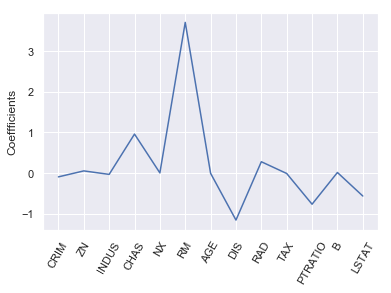

In [37]:
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coeffficients')

In [38]:
df = pd.read_csv('gapminder.csv')

In [39]:
df = df.groupby(['Country']).mean()
df = df.interpolate(method='pad', axis=1)

In [40]:
y = df['life'].values
X = df.drop('life', axis=1).values
df_columns = df.drop('life', axis=1).columns

[ 0.         -0.08000482  0.         -0.04631245  0.        ]


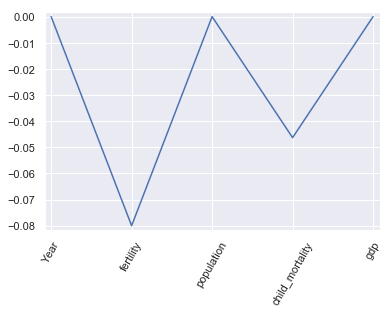

In [41]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [49]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

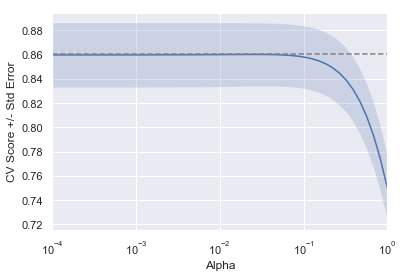

In [50]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)